
## Lebanon Opposition Groups Websites Analysis
### Project Overview
#### Lebanon is considered a test lab for the larger Middle East. Crumbling under disasters, the country is at the brink of total collapse. After the October revolution, the public became unified against the corrupt government. The approaching 2022 elections revived the opposition groups’ shared goal for a functional state. The opposition movements, however, differ in their approach to achieve the goal. This project will attempt to gain insight into the opposition movements’ objectives through Data Mining. Data will be scraped from three opposition web sites using webscraping. Webscraping using HTML parser allows for retrieving text contents from websites and extracting words and their frequencies. Vector space model is then  utilized to generate document-term matrices, allowing for quantitative analysis that helps in highlighting the focus of each party, The project is trying to answer the research question: How are the different opposition parties similar and how do they differ in their vision for political and economical reform? What are their focus and priorities for Lebanon's recovery?
#### Note that the aim was to analyze eight parties' websites, but one only has a social media presence, and four websites use Arabic version only. An extension of the project would be to use google translate so the unincluded websites can be integrated in the analysis. 




### Dependencies

In [1]:
# Importing requests library for HTTP parsing
import requests
import urllib.request, urllib.error, urllib.parse

# Importing Beautiful Soup for parsing HTML
from bs4 import BeautifulSoup

# Importing matplotlib for plotting graph
import matplotlib.pyplot as plt

# Importing Natural Language Toolkit for cleaning and tokenizing the data
import nltk
import nltk.data
from nltk.corpus import stopwords
from nltk.tokenize import WordPunctTokenizer
from nltk import word_tokenize

# Importing Regular Expression for cleaning the data
import re

# Importing libraries for word cloud generation
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Importing libraries for counting frequencies
from collections import Counter

# Importing pandas for generating a data frame for the words of interests
import pandas as pd

# Importing libraries for mathematical operations
import numpy as np

# Importing Natural Language libraries for sentiment analysis

nltk.download('vader_lexicon')
nltk.download('punkt')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import sentiment
import pprint

from PyPDF2 import PdfFileWriter, PdfFileReader

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/nada/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /Users/nada/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Collection
#### The data collection begins with making a dictionary of urls, and the pages of interest. Then, building on the code in exercise six, Beautiful Soup. I added the for loop to populate the soup from all urls. 

In [2]:
# Creating a dictionary of the urls and pages of interest
urls = { 
    'minteshreen': [
        'https://minteshreen.com/en',
        'https://minteshreen.com/en/what-we-stand-for/how-we-got-here',
        'https://minteshreen.com/en/what-we-stand-for/sovereignty',
        'https://minteshreen.com/en/what-we-stand-for/social-policies',
        'https://minteshreen.com/en/what-we-stand-for/a-civil-state'
     ],
      'mmfidawla' : [
        'https://mmfidawla.com/en',
        'https://mmfidawla.com/en/objectives/',
        'https://mmfidawla.com/en/methodology/'
        'https://mmfidawla.com/en/2019/12/08/political-transition-03/',
        'https://mmfidawla.com/en/2019/12/09/political-transition-17/', 
        'https://mmfidawla.com/en/2019/12/09/political-transition-26/'

      ],
      'nationalbloc' : [
         'https://en.nationalbloc.org',
         'https://en.nationalbloc.org/values',
         'https://en.nationalbloc.org/our_vision_social_justice_basic_services',
         'https://en.nationalbloc.org/axes_of_work',
         'https://en.nationalbloc.org/rescue_solution_forming_an_independent_and_sovereign_government_of_competent_specialists',
         'https://en.nationalbloc.org/ministerial_statement',
         'https://en.nationalbloc.org/our_vision_defense_policy'
      ],
      'nahwalwatan' : [
        'https://www.nahwalwatan.org/',
        'https://www.nahwalwatan.org/about-us/',
        'https://www.nahwalwatan.org/our-approach/',
        'https://www.nahwalwatan.org/legal-framework-for-elections/',
        'https://www.nahwalwatan.org/political-vision/'
      ],
      'kullunairada' : [
        'https://kulluna-irada.org/mission-and-blueprint', 
        'https://kulluna-irada.org/issue-1',
        'https://kulluna-irada.org/issue-2',
        'https://kulluna-irada.org/issue-6'
      ],
      'sabaa' : [
        'https://sabaa.org/en/home',
        'https://sabaa.org/en/about/1',
        'https://sabaa.org/en/about/2',
        'https://sabaa.org/en/about/3',
        'https://sabaa.org/en/program/7'   
      ],
     'taqaddum' : [
        'https://taqaddomlb.org/home',
        'https://taqaddomlb.org/principles-%7C-%D9%85%D8%A8%D8%A7%D8%AF%D8%A4%D9%86%D8%A7',
        'https://taqaddomlb.org/values-%7C-%D9%82%D9%8A%D9%85%D9%86%D8%A7'
     ]
}


books = [
        '/Users/nada/Documents/GitHub/Design-and-Development-updated/week14/books/The-vision-MmFiDawla.pdf',
        '/Users/nada/Documents/GitHub/Design-and-Development-updated/week14/books/Political-Paper-Minteshreen.pdf',
        '/Users/nada/Documents/GitHub/Design-and-Development-updated/week14/books/Blueprint-Kulluna-Irada.pdf',
        '/Users/nada/Documents/GitHub/Design-and-Development-updated/week14/books/Political-Papers-Taqaddum.pdf'
        ]


# Populating the soup using requests and a for loop
soups = {}

user_agent = {'User-agent': 'Mozilla/5.0'}


for key in urls.keys():
    soups[ key ] = []
    for url in urls[key]:
        response = requests.get(url, headers = user_agent)
        soups[key].append( response.text )
             

### Processing
#### Cleaning the data using regular expression using the code from exercise thirteen, Twitter Stream. The data is then stored in a dictionaries for the relevant urls.

In [9]:
# Using regular expression to remove symbols and unwanted characters
# re_list = ['(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', '@[A-Za-z0-9_]+','#', '[^\x00-\x7F]', 'x+|[0-9]+', 'u+|[0-9]+']
re_list = ['(https?://)?(www\.)?(\w+\.)?(\w+)(\.\w+)(/.+)?', '@[A-Za-z0-9_]+','#', '[^\x00-\x7F]', 'x+|[0-9]+']

combined_re = re.compile( '|'.join( re_list) )
regex_pattern = '\u00a9|\u00ae|[\u2000-\u3300]|\ud83c[\ud000-\udfff]|\ud83d[\ud000-\udfff]|\ud83e[\ud000-\udfff]'

# Creating a function for cleaning the urls with the WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_urls(u):
    del_amp = BeautifulSoup(u, 'html.parser')
    del_amp_text = del_amp.get_text()
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

# Creating loops to transfer cleaned urls into word bags, then into dictionaries
cleaned_urls = {}
word_bag = {}
dicts = {}
for key in soups.keys():
    cleaned_urls[key] = []
    word_bag[key] = []
    dicts[key] = []
    for i in range(0, len(soups[key]) ):
        cleaned_urls[key].append(cleaning_urls((soups[key][i])))
        word_bag[key].append( ','.join(str(cleaned_urls[key]).split())) 
        dicts[key].append(dict(Counter(word_bag[key][0].split(','))))
        
# pp = pprint.PrettyPrinter(indent=4)
# pp.pprint(dicts)


In [10]:

def get_dict( book_title ):
    with open( book_title, 'rb' ) as f1:
        pdf = PDF.PdfFileReader(f1)
   
        book_words = []
        for n in range(pdf.getNumPages()):
            book_words += re.findall(r'\w+', pdf.getPage(n).extractText().lower())
        
    return( dict( Counter( book_words ) ) )


In [11]:
vocabulary = ["citizen", "law", "state", "environment", "judicial", "progressive", 
              "social", "reforms", "economy", "democracy", "justice", "modern", "rights", 
              "progressive", 'transparency', "identity", "freedom", "education"]

import PyPDF2 as PDF


book_dicts = []
for book in books:
    book_dicts.append( get_dict( book ) )
print(book_dicts)
matrix = []
for vocab in vocabulary:
    book_list = []
    for i in range(len(book_dicts)):
        book_list.append( book_dicts[i][vocab])
    matrix.append( book_list )

c


[{'0': 1464, '1': 72, '2': 387, '3': 388, '4': 504, '5': 389, '6': 468, '44': 20, '7': 174, '12': 1, '00': 8, '56': 16, '65': 35, '07': 152, '8': 47, '09': 5, '06': 11, '02': 17, '55': 15, '26': 14, '9': 25, 'a': 23, '605': 2, 'b': 28, 'c67': 1, 'd': 24, '25': 19, '70': 12, 'e': 7, 'fg': 1, '03': 15, 'h': 36, 'ij': 2, 'k': 17, 'g': 15, 'l': 2, 'm': 14, '60': 55, 'n': 5, 'o': 5, 'c60': 5, '67': 20, 'p0': 2, 'q': 5, 'r': 5, '604': 1, '39': 5, '33': 8, '046': 3, '325': 1, 'q6': 2, '3s': 2, 's': 12, 't6': 1, '63': 5, 'd0': 6, 'u': 7, '655': 3, '62': 11, '52': 4, 'v': 1, 'www': 1, 'g6': 4, 'x': 9, 'b5': 10, 'i': 9, '060': 1, 'y': 8, 'y0': 2, 'lm': 2, '460': 12, '262': 1, '552': 1, '72': 3, '77': 3, '644': 1, '73': 2, 'd4': 1, 'c': 27, '35': 6, 'p6': 3, '04': 14, '43': 3, '677': 1, 'z': 3, '46': 6, '14': 1, '062': 3, 'n6': 2, '626': 3, '411': 1, '45': 4, 'd22': 1, 'c6': 12, 'j': 3, 'l56': 1, '3o': 1, '76': 3, '22': 6, '30': 1, '64': 6, 'y4': 2, '0b': 2, '23': 11, 'w': 2, '3a': 3, '2260': 2, 

KeyError: 'citizen'

In [ ]:
df = pd.DataFrame(matrix, index = vocabulary,columns = titles)

                      
titles = []
for title in books:
    titles.append( title[ title.index('/') + 1 : title.index('/') -1 ])


ax= df.plot.bar()
ax.set_xlabel('vocabulary')
ax.set_ylabel('frequency')
plt.show()

#### Building a data frame of the document term matrix using the code from exercise seven, Textual Analysis.
##### Note that there are typos like the word jstice instead of justice, however these typos don't appear on the website. Looking into this so far did not get me answers, but should learn more for future work.

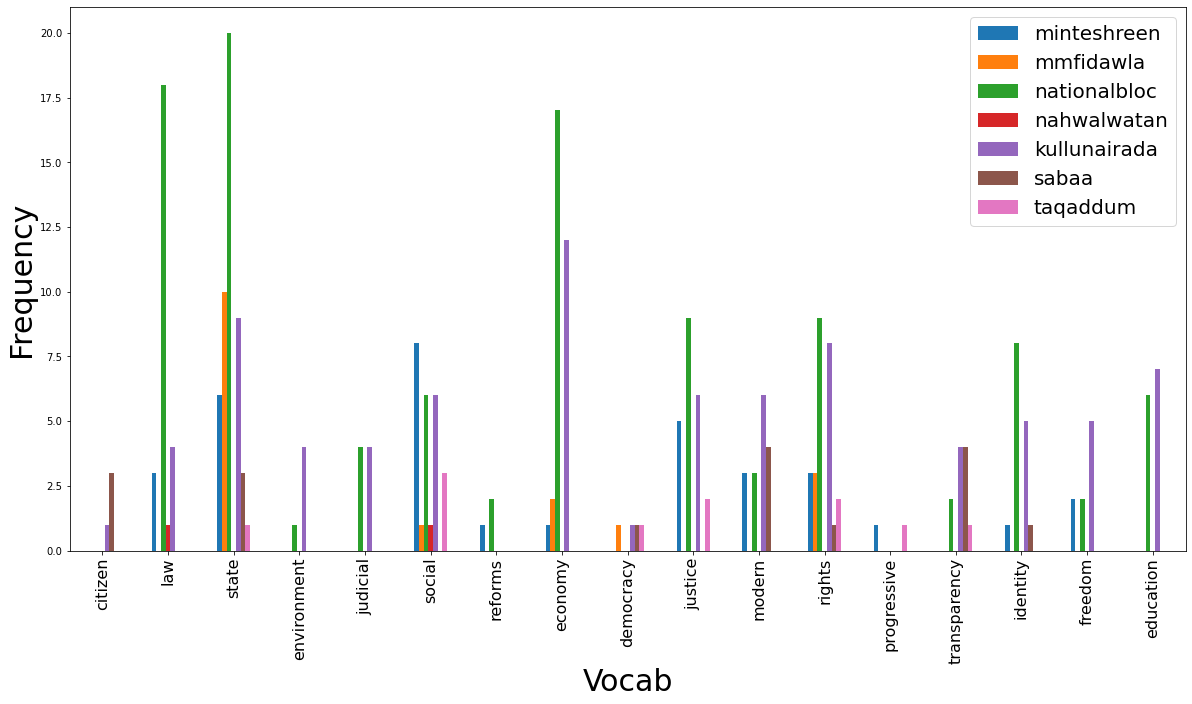

In [12]:
# Creating a list of words of interest

      
vocabulary = ["citizen", "law", "state", "environment", "judicial",  
              "social", "reforms", "economy", "democracy", "justice", "modern", "rights", 
              "progressive", 'transparency', "identity", "freedom", "education"]

# Build a document term matrix for each vocabulary in each dictionary
matrix = []
for vocab in vocabulary:
    word_count = []
    for key in dicts.keys():
        if vocab in dicts[key][0]:
            word_count.append(dicts[key][0][vocab])
        else:
            word_count.append( 0 )       
    matrix.append( word_count )


# Creating a data frame using pandas to compare the occurrence of each word across all three urls
df = pd.DataFrame(matrix, index = vocabulary, columns = dicts.keys())

df
ax= df.plot.bar(figsize=(20, 10))
ax.set_xlabel('Vocab', fontsize=30)
ax.set_ylabel('Frequency', fontsize=30)
plt.xticks(fontsize=16)
plt.legend(fontsize = 20)

plt.savefig("fig1.png")

plt.show()

### Analysis

#### Calculate the Euclidean Distance between the documents using the code from exercise seven, Textual Analysis

In [13]:
# Creating a function for calculating the Euclidean distance
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Creating a loop to iterate through the words of interest
url_titles = list(dicts.keys())

for i in range(len(vocabulary)):
    minteshreen = np.array( matrix[i][0] )
    mmfidawla  = np.array( matrix[i][1] )
    nationalbloc = np.array( matrix[i][2] )
    nahwalwatan = np.array( matrix[i][3])
    kullunairada = np.array( matrix[i][4])
    sabaa = np.array ( matrix[i][5])
    taqaddum = np.array (matrix[i][6])
    
    minteshreenmmfidawla = euclidean_distance (minteshreen , mmfidawla)

# Printing the Euclidean distances between the three urls texts for all words of interest
    print('Euclidean distance for the word [' + vocabulary[ i ] + ']')
    print(' in [' + url_titles[ 0 ] + '] vs. [' + url_titles [ 1 ][:23] + f']: { minteshreenmmfidawla:.2f}')

    minteshreennationalbloc = euclidean_distance(minteshreen, nationalbloc)
    print(' in [' + url_titles[ 0 ] + '] vs. [' + url_titles [ 2 ] + f']: { minteshreennationalbloc:.2f}')
 
    mmfidawlanationalbloc = euclidean_distance(mmfidawla, nationalbloc)
    print(' in [' + url_titles[ 1 ][:24] + '] vs. [' + url_titles [ 2 ] + f']: {mmfidawlanationalbloc:.2f}')
    
    minteshreennahwalwatan = euclidean_distance (minteshreen , nahwalwatan)
    print(' in [' + url_titles[ 0 ] + '] vs. [' + url_titles [ 3 ] + f']: { minteshreennahwalwatan:.2f}')

    
    minteshreenkullunairada = euclidean_distance (minteshreen , kullunairada )
    print(' in [' + url_titles[ 0 ] + '] vs. [' + url_titles [ 4 ] + f']: { minteshreenkullunairada:.2f}')


    minteshreensabaa = euclidean_distance (minteshreen, sabaa)
    print(' in [' + url_titles[ 0 ] + '] vs. [' + url_titles [ 5 ] + f']: { minteshreensabaa:.2f}')

    
    minteshreentaqaddum = euclidean_distance (minteshreen , taqaddum)
    print(' in [' + url_titles[ 0 ] + '] vs. [' + url_titles [ 6 ] + f']: { minteshreentaqaddum:.2f}')

    
    mmfidawlanahwalwatan = euclidean_distance (mmfidawla , nahwalwatan)
    print(' in [' + url_titles[ 1 ] + '] vs. [' + url_titles [ 3 ] + f']: { mmfidawlanahwalwatan:.2f}')

    
    mmfidawlakullunairada = euclidean_distance (mmfidawla , kullunairada)
    print(' in [' + url_titles[ 1 ] + '] vs. [' + url_titles [ 4 ] + f']: { mmfidawlakullunairada:.2f}')

    
    mmfidawlasabaa = euclidean_distance (mmfidawla , sabaa )
    print(' in [' + url_titles[ 1 ] + '] vs. [' + url_titles [ 5 ] + f']: { mmfidawlasabaa:.2f}')

       
    mmfidawlataqaddum = euclidean_distance (mmfidawla ,taqaddum )
    print(' in [' + url_titles[ 1 ] + '] vs. [' + url_titles [ 6 ] + f']: { mmfidawlataqaddum:.2f}')


    nationalblocnahwalwatan = euclidean_distance (nationalbloc , nahwalwatan)
    print(' in [' + url_titles[ 2 ] + '] vs. [' + url_titles [ 3 ] + f']: { nationalblocnahwalwatan:.2f}')


    nationalblockullunairada = euclidean_distance (nationalbloc , kullunairada)
    print(' in [' + url_titles[ 2 ] + '] vs. [' + url_titles [ 4 ] + f']: { nationalblockullunairada:.2f}')

    
    nationalblocsabaa = euclidean_distance (nationalbloc, sabaa)
    print(' in [' + url_titles[ 2 ] + '] vs. [' + url_titles [ 5 ] + f']: { nationalblocsabaa:.2f}')
    
    
    nationalbloctaqaddum = euclidean_distance (nationalbloc , taqaddum)
    print(' in [' + url_titles[ 2 ] + '] vs. [' + url_titles [ 6 ] + f']: { nationalbloctaqaddum:.2f}')
    
    
    nahwalwatankullunairada = euclidean_distance (nahwalwatan , kullunairada )
    print(' in [' + url_titles[ 3 ] + '] vs. [' + url_titles [ 4 ] + f']: { nahwalwatankullunairada:.2f}')
    
    
    nahwalwatansabaa = euclidean_distance (nahwalwatan , sabaa)
    print(' in [' + url_titles[ 3 ] + '] vs. [' + url_titles [ 5 ] + f']: { nahwalwatansabaa:.2f}')
    
    
    nahwalwatantaqaddum = euclidean_distance (nahwalwatan , taqaddum)
    print(' in [' + url_titles[ 3 ] + '] vs. [' + url_titles [ 6 ] + f']: { nahwalwatantaqaddum:.2f}')
    
    
    kullunairadasabaa = euclidean_distance (kullunairada , sabaa )
    print(' in [' + url_titles[ 4 ] + '] vs. [' + url_titles [ 5 ] + f']: { kullunairadasabaa:.2f}')
    
    
    kullunairadataqaddum = euclidean_distance (kullunairada , taqaddum)
    print(' in [' + url_titles[ 4 ] + '] vs. [' + url_titles [ 6 ] + f']: { kullunairadataqaddum:.2f}')
    
    
    sabaataqaddum = euclidean_distance (sabaa , taqaddum)
    print(' in [' + url_titles[ 5 ] + '] vs. [' + url_titles [ 6 ] + f']: { sabaataqaddum:.2f}')
    
    
    
    print('\n')



Euclidean distance for the word [citizen]
 in [minteshreen] vs. [mmfidawla]: 0.00
 in [minteshreen] vs. [nationalbloc]: 0.00
 in [mmfidawla] vs. [nationalbloc]: 0.00
 in [minteshreen] vs. [nahwalwatan]: 0.00
 in [minteshreen] vs. [kullunairada]: 1.00
 in [minteshreen] vs. [sabaa]: 3.00
 in [minteshreen] vs. [taqaddum]: 0.00
 in [mmfidawla] vs. [nahwalwatan]: 0.00
 in [mmfidawla] vs. [kullunairada]: 1.00
 in [mmfidawla] vs. [sabaa]: 3.00
 in [mmfidawla] vs. [taqaddum]: 0.00
 in [nationalbloc] vs. [nahwalwatan]: 0.00
 in [nationalbloc] vs. [kullunairada]: 1.00
 in [nationalbloc] vs. [sabaa]: 3.00
 in [nationalbloc] vs. [taqaddum]: 0.00
 in [nahwalwatan] vs. [kullunairada]: 1.00
 in [nahwalwatan] vs. [sabaa]: 3.00
 in [nahwalwatan] vs. [taqaddum]: 0.00
 in [kullunairada] vs. [sabaa]: 2.00
 in [kullunairada] vs. [taqaddum]: 1.00
 in [sabaa] vs. [taqaddum]: 3.00


Euclidean distance for the word [law]
 in [minteshreen] vs. [mmfidawla]: 3.00
 in [minteshreen] vs. [nationalbloc]: 15.00
 in [m

#### Sentiment Analysis based on the code in exercise twelve, Sentiment.

In [14]:
# Initializing Vader to use on the cleaned urls
sid = SentimentIntensityAnalyzer()

# the variable 'message_text' will contain the text to be analyzed.
# Calling the polarity_scores method on sid and passing in the message_text outputs a dictionary with negative, neutral, positive, and compound scores for the input text
for  url_key in cleaned_urls.keys():
    message_text = str(cleaned_urls[url_key])
    scores = sid.polarity_scores(message_text)
    print(url_key)
    for key in sorted(scores):
        print('\t{0}: {1}, '.format(key, scores[key]), end='')
    print()

minteshreen
	compound: 0.9999, 	neg: 0.061, 	neu: 0.781, 	pos: 0.158, 
mmfidawla
	compound: 0.9998, 	neg: 0.077, 	neu: 0.789, 	pos: 0.134, 
nationalbloc
	compound: 1.0, 	neg: 0.06, 	neu: 0.792, 	pos: 0.148, 
nahwalwatan
	compound: 1.0, 	neg: 0.007, 	neu: 0.837, 	pos: 0.156, 
kullunairada
	compound: 0.989, 	neg: 0.135, 	neu: 0.708, 	pos: 0.157, 
sabaa
	compound: 1.0, 	neg: 0.05, 	neu: 0.762, 	pos: 0.188, 
taqaddum
	compound: 0.9983, 	neg: 0.027, 	neu: 0.747, 	pos: 0.226, 


#### Polarity Scores for Selected Sentences modeled after the code in exercise twelve, Sentiment. 

In [15]:
def my_sentiment( word, message_text ):
    sid = SentimentIntensityAnalyzer()

    # Initializing 'english.pickle' function and give it a short name
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
    sentences = tokenizer.tokenize(message_text)
    #scores = sid.polarity_scores(message_text)
    
#    return( scores['compound'], scores['neg'], scores['neu'], scores['pos'])
#     return(scores)
#     pp.pprint(scores)
#     df = pd.DataFrame(scores, index = scores.keys(), columns = scores)
#     print(df)
    pp = pprint.PrettyPrinter(indent=4)
    my_bucket = {'sentence':[],'compound':[],'neg':[],'neu':[],'pos':[]}
    # Iterating through the list of sentences and calculating and printing polarity scores for each one.
    for sentence in sentences:

            scores = sid.polarity_scores(sentence)
            
            my_bucket['sentence'].append(sentence)
            my_bucket['compound'].append(scores['compound'])
            my_bucket['neg'].append(scores['neg'])
            my_bucket['neu'].append(scores['neu'])
            my_bucket['pos'].append(scores['pos'])
    
            #pp.pprint(my_bucket)
            
            #df = pd.DataFrame(scores, index = scores.keys(), columns = scores)
#             print(df)
#             for key in sorted(scores):
#                     print('{0}: {1}, '.format(key, scores[key]), end='')
#             print()
    #return( scores['compound'], scores['neg'], scores['neu'], scores['pos'])
    return(my_bucket)

In [16]:
# my_sentence = "He refuses to advance arms outside the state, and to subjugate its sovereignty in foreign policy, war and peace to any external party. He appreciates the sacrifices of every Lebanese who resisted foreign occupation in defense of Lebanon's sovereignty and independence. The organization approaches the solution to the problem of Hezbollah's weapons through the gateway to presenting a different model of governance that restores confidence in the state and its ability to protect the Lebanese from all external dangers, including the Israeli enemy.# Breaking up the paragraph into a list of strings."
# my_score = my_sentiment( my_words[i], my_sentence )
# print(my_score)

In [17]:
pp = pprint.PrettyPrinter()
my_scores = []
my_words = [ "Minteshreen","MmFiDawla","NationalBloc", "NahwalWatan", "KullunaIrada", "Sabaa","Taqaddum"  ]
my_sentences = ["Faced with this reality, which we are currently experiencing with regard to Hezbollah’s weapons, it is imperative to adopt a comprehensive defense strategy, not only military, but also economic, social and diplomatic. It is also important that this defense strategy has the support of the widest segment of the Lebanese people, and returns the task of defending Lebanon to the military and security institutions.", 
                "Because Hezbollah is the largest force today, and because it is also a target, we state that we disagree with Hezbollah because it is an active participant in this system, and we have a fundamental difference regarding the internal political approach. We believe that today, by using all its credit - which is great - to protect the dwindling political system, it faces and prevents the chance of a serious rescue opportunity of society.",
                "Law enforcement and security in Lebanon is a grey area involving a confluence of actors that include state institutions, international actors and Hezbollah.  The Lebanese Army remains trapped in the inextricable politics of Lebanon, vis-à-vis Hezbollah’s territorial control.",
                "The sovereignty of the state is absolute and complete, indivisible by land, sea, air and natural resources such as water, oil and gas. The Lebanese Republic, through its constitutional institutions, takes all decisions related to its internal affairs and foreign policy on the basis of the supreme national interest solely, including the conclusion of alliances and treaties and the decision of war and peace. It distances itself from external disputes and does not interfere in the internal affairs of other countries.",
                "We must implement laws in order to support the army and security forces; they should enjoy the power necessary to perform their duties without nepotism or clientelism. We must work on re-consolidating trust among the Lebanese and between them and governmental institutions through military and civil service programs, among others.",
                "Since the building of a modern state can only be achieved through a radical change in the Lebanese political and party life and the establishment of new parties that undertake to change the reality and the uprising against it. Therefore, Sabaa will lead a comprehensive coup against the current reality and the existing political standards to liberate the citizen and to undertake a historic revival.",
                "He refuses to advance arms outside the state, and to subjugate its sovereignty in foreign policy, war and peace to any external party. He appreciates the sacrifices of every Lebanese who resisted foreign occupation in defense of Lebanon's sovereignty and independence. The organization approaches the solution to the problem of Hezbollah's weapons through the gateway to presenting a different model of governance that restores confidence in the state and its ability to protect the Lebanese from all external dangers, including the Israeli enemy."
               ]


for i in range(0,len(my_words)):
    my_scores.append( my_sentiment( my_words[i], my_sentences[ i ] ) ) 

#print(my_scores)


df = pd.DataFrame(my_scores, index = my_words, columns = [ 'sentence', 'compound', 'neg', 'neu', 'pos' ])
pd.set_option('display.max_colwidth', 0)
df

matrix = []
for i in range(0,len(df)):
    for j in range(0, len(df.sentence[i])):
        row = { 'group': df.index[i], 'sentence': df.sentence[i][j], 'compound':df.compound[i][j], 'neg':df.neg[i][j], 'neu': df.neu[i][j], 'pos': df.pos[i][j] }
        matrix.append( row )

        
ddf = pd.DataFrame(matrix)
ddf.describe()
ddf.head()
ddf


# import seaborn as  sns

# sns.set_context('notebook')
# sns.set(font_scale = 2)

# sns.catplot(x='group',y = 'compound', data=ddf, kind='box', height=15, aspect=11.7/8.7, order = my_words )

# #print([ddf['group']])


# # df.groupby(df.index)
# #ddf.plot.bar()
# # ax= ddf.plot.bar(figsize=(20, 10))

# #l = ddf.index
# l = ["Taqaddum", "Taqaddum", "Taqaddum", "Sabaa", "Sabaa", "KullunaIrada", "KullunaIrada", "NahwalWatan", "NahwalWatan", "NahwalWatan", "NationalBloc", "NationalBloc", "MmFiDawla", "MmFiDawla", "Minteshreen", "Minteshreen"]

# ax= ddf.plot.bar(figsize=(20, 10))

# ax.set_xlabel( "Opposition Group", fontsize=15)
# ax.set_ylabel('Sentiment Score', fontsize=15)

# ax.set_xticklabels = ["Taqaddum", "Taqaddum", "Taqaddum", "Sabaa", "Sabaa", "KullunaIrada", "KullunaIrada", "NahwalWatan", "NahwalWatan", "NahwalWatan", "NationalBloc", "NationalBloc", "MmFiDawla", "MmFiDawla", "Minteshreen", "Minteshreen"]


# plt.xticks(rotation=45)

# plt.xticks(fontsize=16)
# plt.legend(fontsize = 20)
# plt.show()

,group,sentence,compound,neg,neu,pos
0,Minteshreen,"Faced with this reality, which we are currently experiencing with regard to Hezbollah’s weapons, it is imperative to adopt a comprehensive defense strategy, not only military, but also economic, social and diplomatic.",0.0387,0.059,0.817,0.124
1,Minteshreen,"It is also important that this defense strategy has the support of the widest segment of the Lebanese people, and returns the task of defending Lebanon to the military and security institutions.",0.7506,0.000,0.769,0.231
2,MmFiDawla,"Because Hezbollah is the largest force today, and because it is also a target, we state that we disagree with Hezbollah because it is an active participant in this system, and we have a fundamental difference regarding the internal political approach.",0.0258,0.061,0.875,0.064
3,MmFiDawla,"We believe that today, by using all its credit - which is great - to protect the dwindling political system, it faces and prevents the chance of a serious rescue opportunity of society.",0.9468,0.031,0.524,0.445
4,NationalBloc,"Law enforcement and security in Lebanon is a grey area involving a confluence of actors that include state institutions, international actors and Hezbollah.",0.3818,0.000,0.841,0.159
5,NationalBloc,"The Lebanese Army remains trapped in the inextricable politics of Lebanon, vis-à-vis Hezbollah’s territorial control.",-0.5267,0.195,0.805,0.000
6,NahwalWatan,"The sovereignty of the state is absolute and complete, indivisible by land, sea, air and natural resources such as water, oil and gas.",0.3612,0.000,0.898,0.102
7,NahwalWatan,"The Lebanese Republic, through its constitutional institutions, takes all decisions related to its internal affairs and foreign policy on the basis of the supreme national interest solely, including the conclusion of alliances and treaties and the decision of war and peace.",0.7351,0.076,0.725,0.198
8,NahwalWatan,It distances itself from external disputes and does not interfere in the internal affairs of other countries.,-0.2732,0.116,0.884,0.000
9,KullunaIrada,We must implement laws in order to support the army and security forces; they should enjoy the power necessary to perform their duties without nepotism or clientelism.,0.8074,0.000,0.743,0.257


### Visualization
#### Plot the data frame matrix of the words of interest

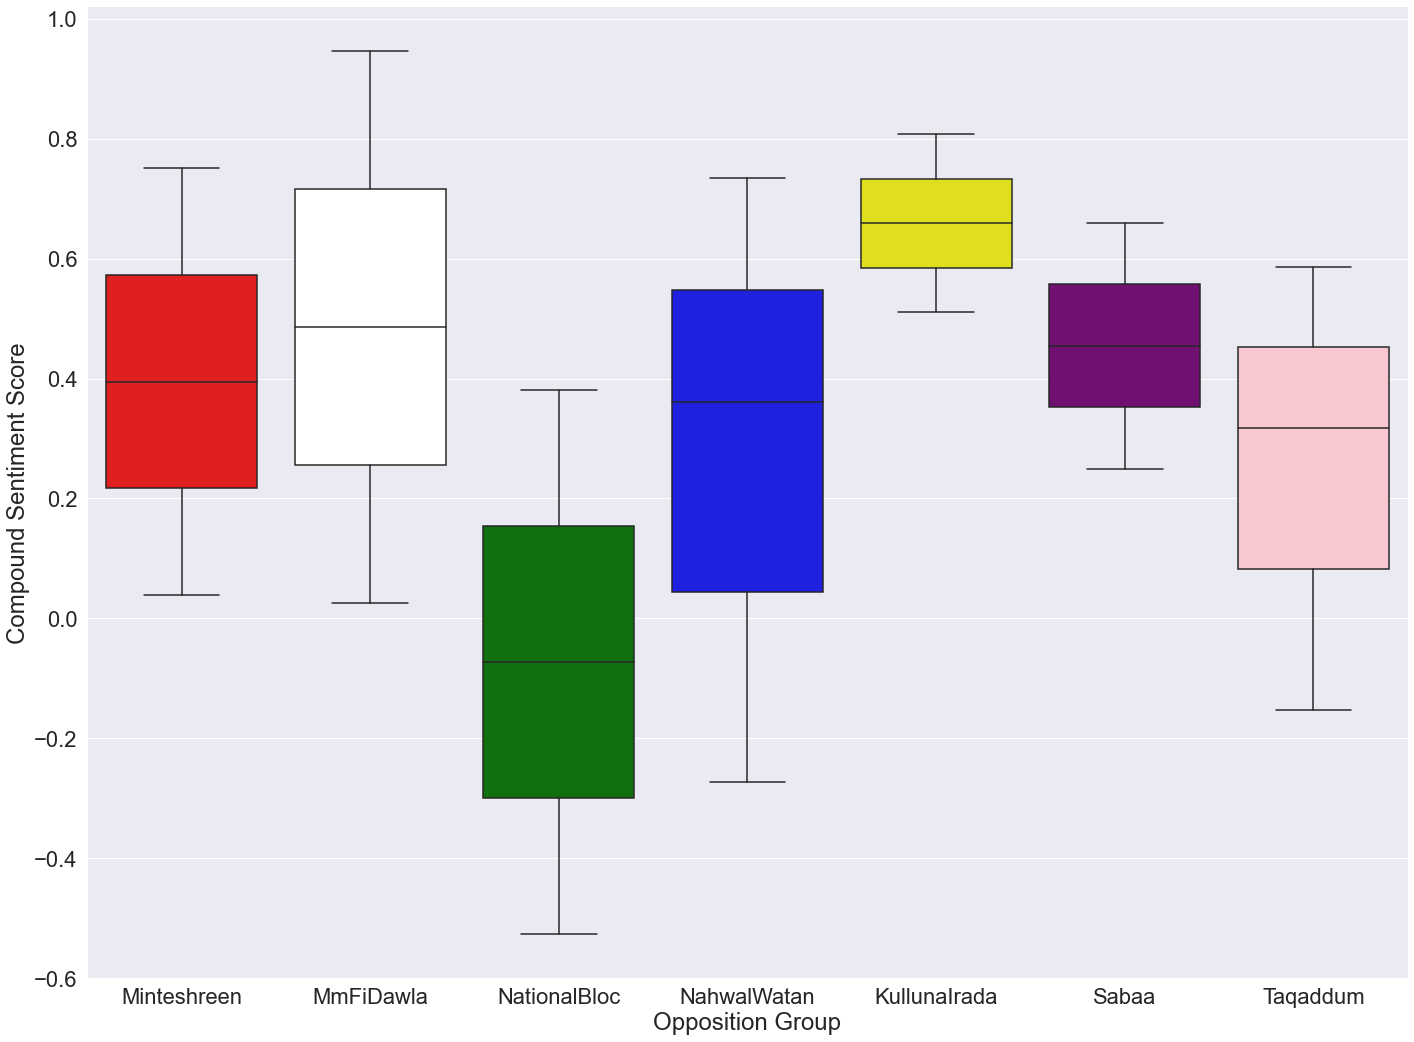

In [26]:
pp = pprint.PrettyPrinter()
my_scores = []
my_words = [ "Minteshreen","MmFiDawla","NationalBloc", "NahwalWatan", "KullunaIrada", "Sabaa","Taqaddum"  ]
my_sentences = ["Faced with this reality, which we are currently experiencing with regard to Hezbollah’s weapons, it is imperative to adopt a comprehensive defense strategy, not only military, but also economic, social and diplomatic. It is also important that this defense strategy has the support of the widest segment of the Lebanese people, and returns the task of defending Lebanon to the military and security institutions.", 
                "Because Hezbollah is the largest force today, and because it is also a target, we state that we disagree with Hezbollah because it is an active participant in this system, and we have a fundamental difference regarding the internal political approach. We believe that today, by using all its credit - which is great - to protect the dwindling political system, it faces and prevents the chance of a serious rescue opportunity of society.",
                "Law enforcement and security in Lebanon is a grey area involving a confluence of actors that include state institutions, international actors and Hezbollah.  The Lebanese Army remains trapped in the inextricable politics of Lebanon, vis-à-vis Hezbollah’s territorial control.",
                "The sovereignty of the state is absolute and complete, indivisible by land, sea, air and natural resources such as water, oil and gas. The Lebanese Republic, through its constitutional institutions, takes all decisions related to its internal affairs and foreign policy on the basis of the supreme national interest solely, including the conclusion of alliances and treaties and the decision of war and peace. It distances itself from external disputes and does not interfere in the internal affairs of other countries.",
                "We must implement laws in order to support the army and security forces; they should enjoy the power necessary to perform their duties without nepotism or clientelism. We must work on re-consolidating trust among the Lebanese and between them and governmental institutions through military and civil service programs, among others.",
                "Since the building of a modern state can only be achieved through a radical change in the Lebanese political and party life and the establishment of new parties that undertake to change the reality and the uprising against it. Therefore, Sabaa will lead a comprehensive coup against the current reality and the existing political standards to liberate the citizen and to undertake a historic revival.",
                "He refuses to advance arms outside the state, and to subjugate its sovereignty in foreign policy, war and peace to any external party. He appreciates the sacrifices of every Lebanese who resisted foreign occupation in defense of Lebanon's sovereignty and independence. The organization approaches the solution to the problem of Hezbollah's weapons through the gateway to presenting a different model of governance that restores confidence in the state and its ability to protect the Lebanese from all external dangers, including the Israeli enemy."
               ]

for i in range(0,len(my_words)):
    my_scores.append( my_sentiment( my_words[i], my_sentences[ i ] ) ) 

#print(my_scores)


df = pd.DataFrame(my_scores, index = my_words, columns = [ 'sentence', 'compound', 'neg', 'neu', 'pos' ])
pd.set_option('display.max_colwidth', 0)
df

matrix = []
for i in range(0,len(df)):
    for j in range(0, len(df.sentence[i])):
        row = { 'group': df.index[i], 'sentence': df.sentence[i][j], 'compound':df.compound[i][j], 'neg':df.neg[i][j], 'neu': df.neu[i][j], 'pos': df.pos[i][j] }
        matrix.append( row )
        
import seaborn as  sns

sns.set_context('notebook')
sns.set(font_scale = 2)

sns_plot = sns.catplot(x='group',y = 'compound', data=ddf, kind='box', height=15, aspect=11.7/8.7, order = my_words, palette=sns.color_palette(['red', 'white', 'green', 'blue', 'yellow', 'purple', 'pink']) )
sns_plot.set(xlabel='Opposition Group', ylabel='Compound Sentiment Score')
sns_plot.figure.savefig("3_1.png")


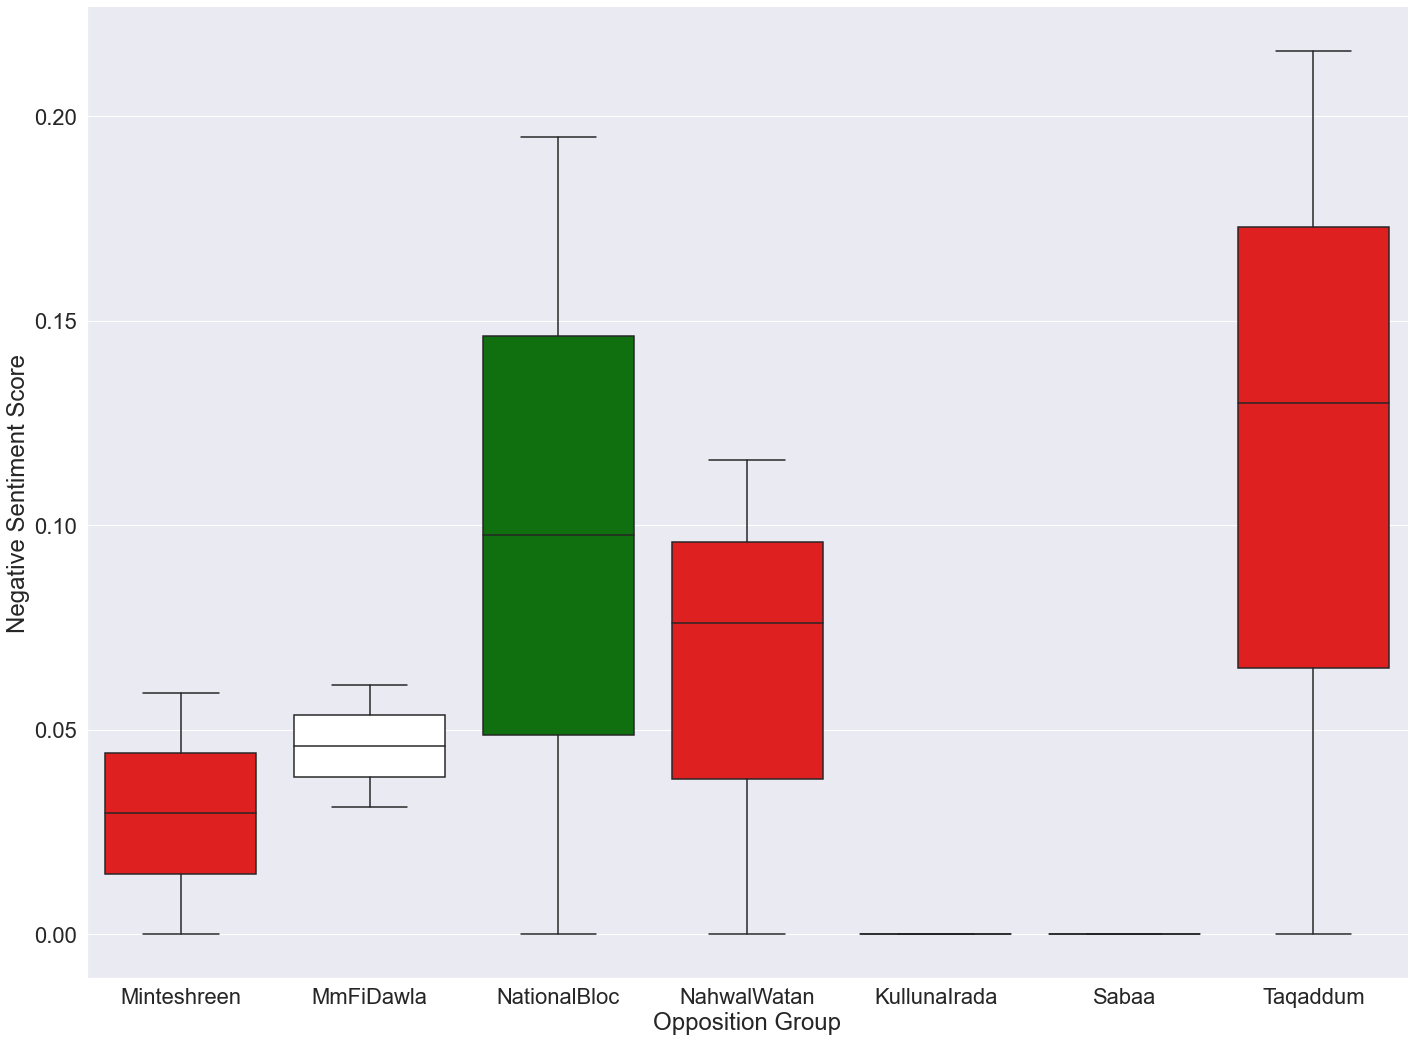

In [23]:
pp = pprint.PrettyPrinter()
my_scores = []
my_words = [ "Minteshreen","MmFiDawla","NationalBloc", "NahwalWatan", "KullunaIrada", "Sabaa","Taqaddum"  ]
my_sentences = ["Faced with this reality, which we are currently experiencing with regard to Hezbollah’s weapons, it is imperative to adopt a comprehensive defense strategy, not only military, but also economic, social and diplomatic. It is also important that this defense strategy has the support of the widest segment of the Lebanese people, and returns the task of defending Lebanon to the military and security institutions.", 
                "Because Hezbollah is the largest force today, and because it is also a target, we state that we disagree with Hezbollah because it is an active participant in this system, and we have a fundamental difference regarding the internal political approach. We believe that today, by using all its credit - which is great - to protect the dwindling political system, it faces and prevents the chance of a serious rescue opportunity of society.",
                "Law enforcement and security in Lebanon is a grey area involving a confluence of actors that include state institutions, international actors and Hezbollah.  The Lebanese Army remains trapped in the inextricable politics of Lebanon, vis-à-vis Hezbollah’s territorial control.",
                "The sovereignty of the state is absolute and complete, indivisible by land, sea, air and natural resources such as water, oil and gas. The Lebanese Republic, through its constitutional institutions, takes all decisions related to its internal affairs and foreign policy on the basis of the supreme national interest solely, including the conclusion of alliances and treaties and the decision of war and peace. It distances itself from external disputes and does not interfere in the internal affairs of other countries.",
                "We must implement laws in order to support the army and security forces; they should enjoy the power necessary to perform their duties without nepotism or clientelism. We must work on re-consolidating trust among the Lebanese and between them and governmental institutions through military and civil service programs, among others.",
                "Since the building of a modern state can only be achieved through a radical change in the Lebanese political and party life and the establishment of new parties that undertake to change the reality and the uprising against it. Therefore, Sabaa will lead a comprehensive coup against the current reality and the existing political standards to liberate the citizen and to undertake a historic revival.",
                "He refuses to advance arms outside the state, and to subjugate its sovereignty in foreign policy, war and peace to any external party. He appreciates the sacrifices of every Lebanese who resisted foreign occupation in defense of Lebanon's sovereignty and independence. The organization approaches the solution to the problem of Hezbollah's weapons through the gateway to presenting a different model of governance that restores confidence in the state and its ability to protect the Lebanese from all external dangers, including the Israeli enemy."
               ]

for i in range(0,len(my_words)):
    my_scores.append( my_sentiment( my_words[i], my_sentences[ i ] ) ) 

#print(my_scores)


df = pd.DataFrame(my_scores, index = my_words, columns = [ 'sentence', 'compound', 'neg', 'neu', 'pos' ])
pd.set_option('display.max_colwidth', 0)
df

matrix = []
for i in range(0,len(df)):
    for j in range(0, len(df.sentence[i])):
        row = { 'group': df.index[i], 'sentence': df.sentence[i][j], 'compound':df.compound[i][j], 'neg':df.neg[i][j], 'neu': df.neu[i][j], 'pos': df.pos[i][j] }
        matrix.append( row )
import seaborn as  sns

sns.set_context('notebook')
sns.set(font_scale = 2)

sns_plot = sns.catplot(x='group',y = 'neg', data=ddf, kind='box', height=15, aspect=11.7/8.7, order = my_words, palette=sns.color_palette(['red', 'white', 'green']) )

sns_plot.set(xlabel='Opposition Group', ylabel='Negative Sentiment Score')
sns_plot.figure.savefig("3_2.png")

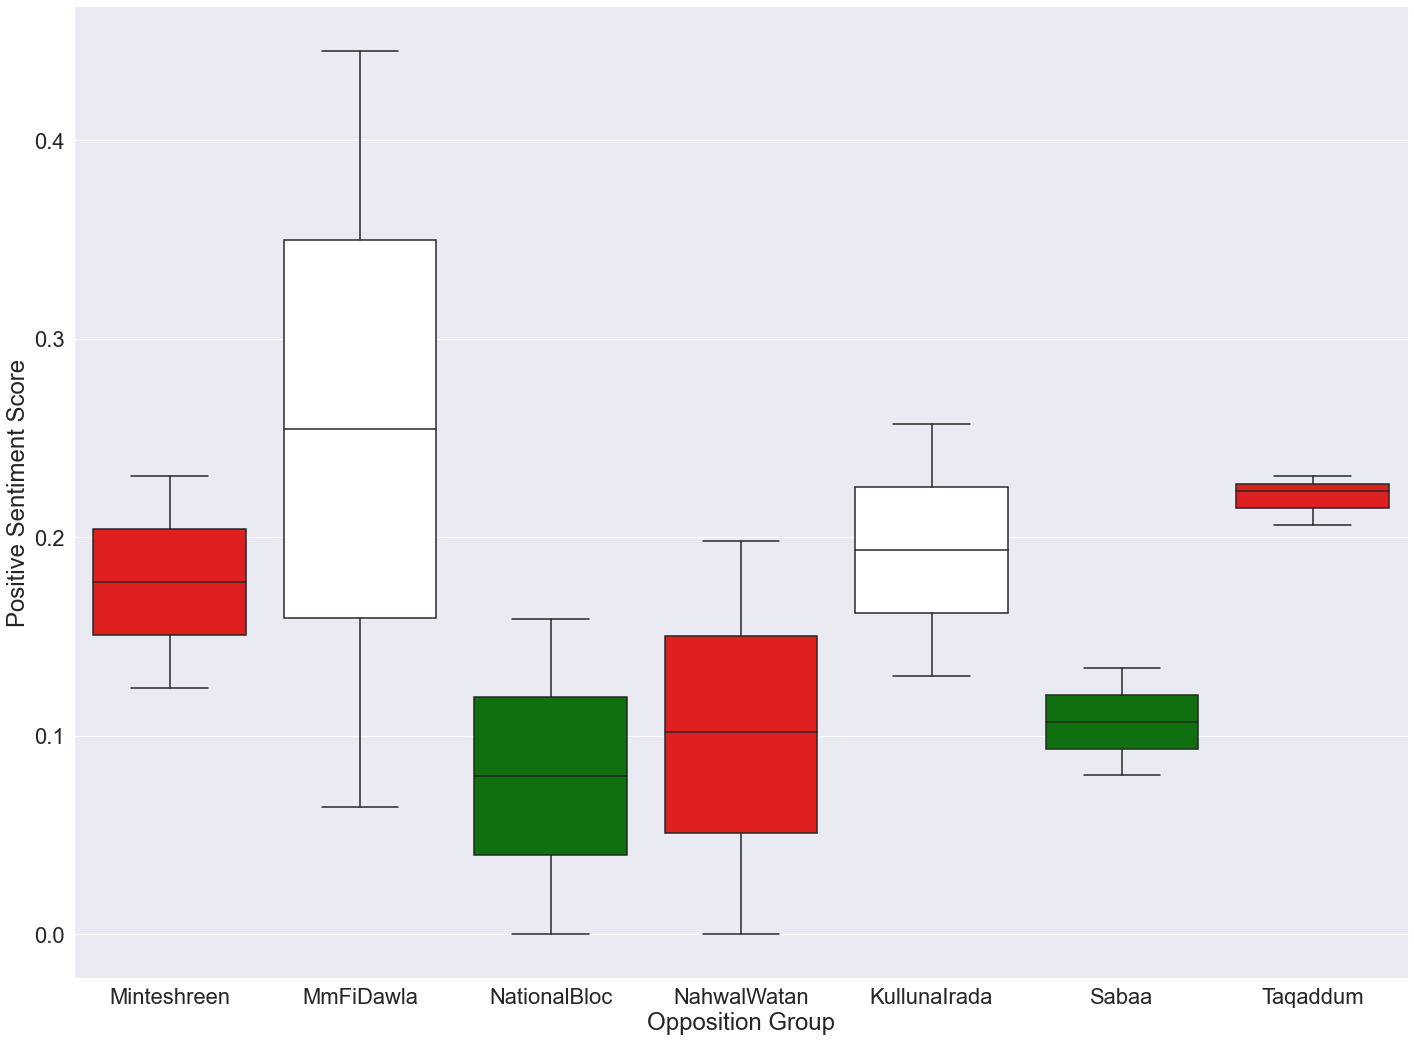

In [24]:
pp = pprint.PrettyPrinter()
my_scores = []
my_words = [ "Minteshreen","MmFiDawla","NationalBloc", "NahwalWatan", "KullunaIrada", "Sabaa","Taqaddum"  ]
my_sentences = ["Faced with this reality, which we are currently experiencing with regard to Hezbollah’s weapons, it is imperative to adopt a comprehensive defense strategy, not only military, but also economic, social and diplomatic. It is also important that this defense strategy has the support of the widest segment of the Lebanese people, and returns the task of defending Lebanon to the military and security institutions.", 
                "Because Hezbollah is the largest force today, and because it is also a target, we state that we disagree with Hezbollah because it is an active participant in this system, and we have a fundamental difference regarding the internal political approach. We believe that today, by using all its credit - which is great - to protect the dwindling political system, it faces and prevents the chance of a serious rescue opportunity of society.",
                "Law enforcement and security in Lebanon is a grey area involving a confluence of actors that include state institutions, international actors and Hezbollah.  The Lebanese Army remains trapped in the inextricable politics of Lebanon, vis-à-vis Hezbollah’s territorial control.",
                "The sovereignty of the state is absolute and complete, indivisible by land, sea, air and natural resources such as water, oil and gas. The Lebanese Republic, through its constitutional institutions, takes all decisions related to its internal affairs and foreign policy on the basis of the supreme national interest solely, including the conclusion of alliances and treaties and the decision of war and peace. It distances itself from external disputes and does not interfere in the internal affairs of other countries.",
                "We must implement laws in order to support the army and security forces; they should enjoy the power necessary to perform their duties without nepotism or clientelism. We must work on re-consolidating trust among the Lebanese and between them and governmental institutions through military and civil service programs, among others.",
                "Since the building of a modern state can only be achieved through a radical change in the Lebanese political and party life and the establishment of new parties that undertake to change the reality and the uprising against it. Therefore, Sabaa will lead a comprehensive coup against the current reality and the existing political standards to liberate the citizen and to undertake a historic revival.",
                "He refuses to advance arms outside the state, and to subjugate its sovereignty in foreign policy, war and peace to any external party. He appreciates the sacrifices of every Lebanese who resisted foreign occupation in defense of Lebanon's sovereignty and independence. The organization approaches the solution to the problem of Hezbollah's weapons through the gateway to presenting a different model of governance that restores confidence in the state and its ability to protect the Lebanese from all external dangers, including the Israeli enemy."
               ]

for i in range(0,len(my_words)):
    my_scores.append( my_sentiment( my_words[i], my_sentences[ i ] ) ) 

#print(my_scores)


df = pd.DataFrame(my_scores, index = my_words, columns = [ 'sentence', 'compound', 'neg', 'neu', 'pos' ])
pd.set_option('display.max_colwidth', 0)
df

matrix = []
for i in range(0,len(df)):
    for j in range(0, len(df.sentence[i])):
        row = { 'group': df.index[i], 'sentence': df.sentence[i][j], 'compound':df.compound[i][j], 'neg':df.neg[i][j], 'neu': df.neu[i][j], 'pos': df.pos[i][j] }
        matrix.append( row )

import seaborn as  sns

sns.set_context('notebook')
sns.set(font_scale = 2)

sns_plot = sns.catplot(x='group',y = 'pos', data=ddf, kind='box', height=15, aspect=11.7/8.7, order = my_words, palette=sns.color_palette(['red', 'white', 'green']) )
sns_plot.set(xlabel='Opposition Group', ylabel='Positive Sentiment Score')
sns_plot.figure.savefig("3_3.png")


#### Word Cloud for each url.

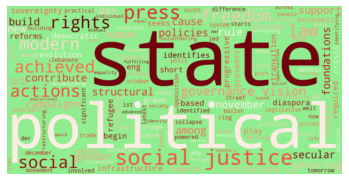

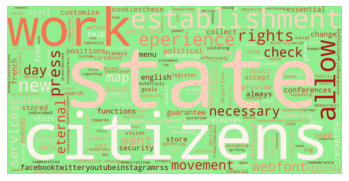

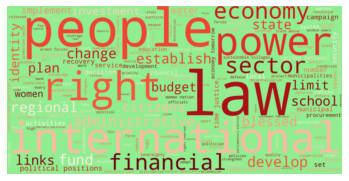

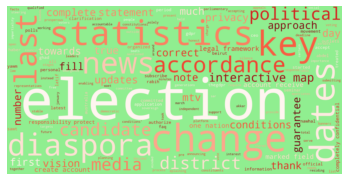

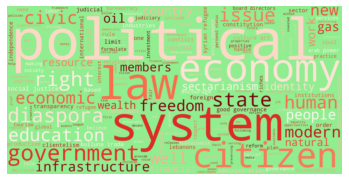

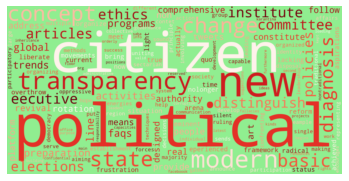

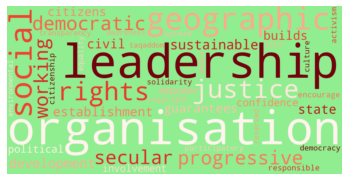

In [51]:
# Defining stopwords using library and a set update
stopwords = set(STOPWORDS)
stopwords.update(['truetype', 'policy', 'adopts','opt', 'domain', 'refuse', 'electoral', 'rindala', 'beydoun', 'false', 
                  'form', 'newsletter', 'name', 'signing', 'enable', 'disable', 'est','full', 'program', 
                  'blueprint', 'groups', 'parties', 'mission', 'principles', 'values', 'thematic', 'nous', 
                  'dans', 'home', 'nahwal', 'watan', 'please', 'data', 'download', 'must', 'shold', 'sabaa', 
                  'page', 'candidates', 'semaan', 'elias', 'layal', 'blog', 'homeabout', 'papers', 'morehomeabout',
                  'organization', 'son', 'tmt', 'notre', 'statements', 'manifesto', 'ground', 'gallery', 
                  'scroll','lebanon','volunteer', 'got', 'email', 'video', 'let', 'contact', 'terms', 'guide',
                  'june','may','public','member', 'story', 'about','find', 'join','lebanese', 'minteshreen', 
                  'national', 'bloc', 'party','donate', 'read', 'become', 'settings', 'site', 'cookie', 
                  'browser', 'setting', 'mounir', 'will', 'analytics', 'google', 'click', 'your', 'website', 
                  'cookies', 'measure', 'source', 'plugin', 'https', 'f', 'font', 'null', 'input', 'image', 
                  'mmfidawla', 'aviacookierefused','searchaction', 'function', 'l', 't', 'a','of','the','is',
                  'an', 'it', 'm', 'by', 'this', 'in', 'on', 's', 'i', 'over', 'and', 'or', 'to', 'use'])
#df = pd.DataFrame(matrix, index = vocabulary,columns = dicts.keys())
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)
# Plotting the wordcloud for 
for key in soups.keys():
    wordcloud = WordCloud(width=2000, height=1000, background_color='lightgreen', colormap="Reds", stopwords=stopwords).generate(word_bag[key][0])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.xlabel(key)
    ax =plt.gca()
    plt.axis("off")
    #ax.axes.xaxis.set_visible(False)
    plt.grid(False)
    plt.savefig(key + ".png")
    plt.show()


#### This project gives an idea on the different messages the three opposition websites are offering. The first one, Minteshreen, seems to be more focused on social justice while maintaining a balanced overview. The second, MmFiDawla, is more concerned with the structure of the state and its citizens. The third, National Bloc, maintains a balanced outlook while prioritizing law and justice. The sentiment analysis of the three websites shows enthusiasm and positivity mostly at Minteshreen, reflecting its popularity among younger generations. 
#### The project can be further extended to include more analytical aspect such as topic modeling. It can also analyze a specific political area more in depth to pick up important nuances.


In [25]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
#OS is for navigating directories on the computer
import os



[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nada/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/nada/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [26]:


txt_books = [
        '/Users/nada/Documents/GitHub/Design-and-Development-updated/week14/books/MmFiDawla.txt',
        '/Users/nada/Documents/GitHub/Design-and-Development-updated/week14/books/Minteshreen.txt',
        '/Users/nada/Documents/GitHub/Design-and-Development-updated/week14/books/KullunaIrada.txt',
        '/Users/nada/Documents/GitHub/Design-and-Development-updated/week14/books/Taqaddum.txt',
        '/Users/nada/Documents/GitHub/Design-and-Development-updated/week14/books/NationalBlock.txt',
        '/Users/nada/Documents/GitHub/Design-and-Development-updated/week14/books/Nahwaalwatan.txt',
        '/Users/nada/Documents/GitHub/Design-and-Development-updated/week14/books/Sabaa.txt'
        ]


        

In [27]:
textdir = '/Users/nada/Documents/GitHub/Design-and-Development-updated/week11/text_files'
os.chdir(textdir)

In [28]:
for filename in txt_books:
    #If the filename ends with .txt...
    if not filename.endswith('-adj.txt'):
        #Create an output name that adds '-nouns' to the filename
        outname = filename.replace('.txt','-adj.txt')
        #Open the file
        with open(filename, 'r', encoding="utf-8") as f:
            #Open the output file
            print(filename)
            with open(outname, 'w') as out:
                #Read the text from the file
                text = f.read()
                #print(text)
                #Split the text into a list of sentences
                sentences = nltk.sent_tokenize(text)
                #print( sentences )
                #For each sentence in the list of sentences...
                for sentence in sentences:
                    #For each word and each part-of-speech tag that you get
                    #When NLTK tokenizes the sentence (splitting words from punctuation, etc.)
                    for word,pos in nltk.pos_tag(nltk.word_tokenize(str(sentence))):
                        #If the part-of-speech is noun
                        #if (pos == 'NN' or pos == 'NNS'):
                        #You can sub in other parts of speech, too
                        #Just comment out the noun code, and uncomment one of these
                        #Adverbs
                        #if (pos == 'RB' or pos == 'RBR' or pos == 'RBS'):
                        #Adjectives
                        #if (pos == 'JJ' or pos == 'JJR' or pos == 'JJS'):
                        #Verbs
                        if (pos == 'VB' or pos == 'VBD' or pos == 'VBG' or pos == 'VBN' or pos == 'VBP' or pos == 'VBZ'):
                            #Write the word (which should be a noun) to the output file
                            out.write(word)
                            #Write a space so the words don't smush together
                            out.write(' ')

/Users/nada/Documents/GitHub/Design-and-Development-updated/week14/books/MmFiDawla.txt
/Users/nada/Documents/GitHub/Design-and-Development-updated/week14/books/Minteshreen.txt
/Users/nada/Documents/GitHub/Design-and-Development-updated/week14/books/KullunaIrada.txt
/Users/nada/Documents/GitHub/Design-and-Development-updated/week14/books/Taqaddum.txt
/Users/nada/Documents/GitHub/Design-and-Development-updated/week14/books/NationalBlock.txt
/Users/nada/Documents/GitHub/Design-and-Development-updated/week14/books/Nahwaalwatan.txt
/Users/nada/Documents/GitHub/Design-and-Development-updated/week14/books/Sabaa.txt


In [29]:
import os
def load_directory(directory, max_length):
    documents, titles = [], []
    for filename in os.scandir(directory):
        #change this to analyze a different component after changing the save above
        if not filename.name.endswith('-adj.txt'):
            continue

        with open(filename.path) as f:
            contents = f.read()
        
        lemmas = contents.lower().split()

        start_idx, end_idx, segm_cnt = 0, max_length, 1
        
        # extract slices from the text:
        #print(len(lemmas), start_idx, end_idx)
        while end_idx < len(lemmas):
            #print(len(lemmas), start_idx, end_idx)
            documents.append(' '.join(lemmas[start_idx:end_idx]))
            title = filename.name.replace('-adj.txt', '')
            titles.append(f"{title}-{segm_cnt}")
            
            start_idx += max_length
            end_idx += max_length
            segm_cnt += 1

    return documents, titles

In [30]:

# counted_words = wordsToDictionary(test_words)
# counted_words = sortDictionary(counted_words)
# print(counted_words)

textdir = '/Users/nada/Documents/GitHub/Design-and-Development-updated/week14/books'
os.chdir(textdir)

# stopwords = ['a','of','the','is', 'an', 'by', 'this', 'in', 'on', 's', 'i', 'over', 'and', 'or', 'to', 'be', 'are']

# def removeStopWords(textdir, stopwords):
#     return [w for w in textdir if w not in stopwords]

# textdir = removeStopWords(textdir, stopwords)


documents, titles = load_directory(textdir, 150)

#print( os.getcwd())

#print(documents,titles)

import sklearn.feature_extraction.text as text
#print(textdir)

vectorizer = text.CountVectorizer(max_features=30, token_pattern=r"(?u)\b\w+\b")
v_documents = vectorizer.fit_transform(documents).toarray()

print(v_documents.shape)

print(vectorizer.get_feature_names()[:10])

(19, 30)
['abolishing', 'adopt', 'adopting', 'amending', 'are', 'based', 'be', 'become', 'been', 'developing']


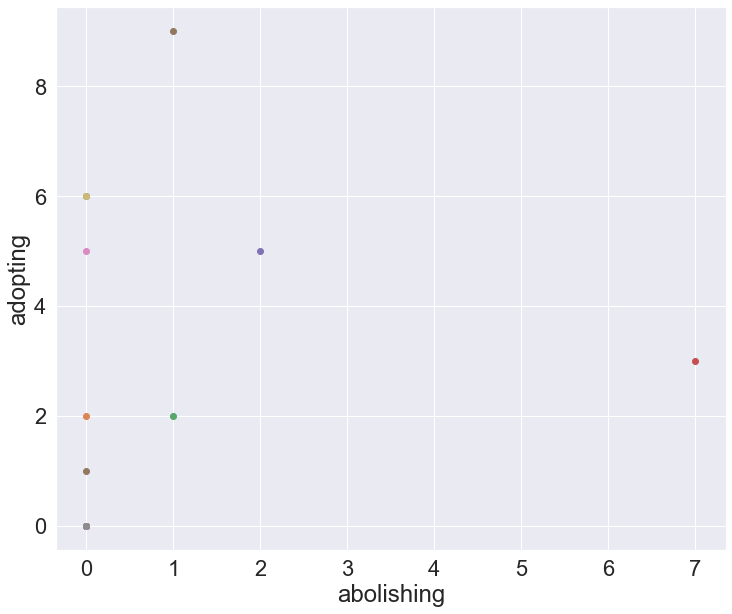

In [39]:
import matplotlib.pyplot as plt
import numpy as np

words = vectorizer.get_feature_names()

titles = np.array(titles)

x = v_documents[:, words.index('abolishing')]
y = v_documents[:, words.index('adopting')]

fig, ax = plt.subplots(figsize=(12,10))

fig.add_subplot(ax)
#fig.set_size_inches(12,10)
for title in set(titles):
    ax.scatter(x[titles==title], y[titles==title], label=title)
ax.set(xlabel='abolishing', ylabel='adopting')



#os.chdir("../")
fig.savefig("fig4_1.png")

#plt.legend()

In [36]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components=2)
documents_proj = pca.fit_transform( v_documents )

print(v_documents.shape)



(19, 30)


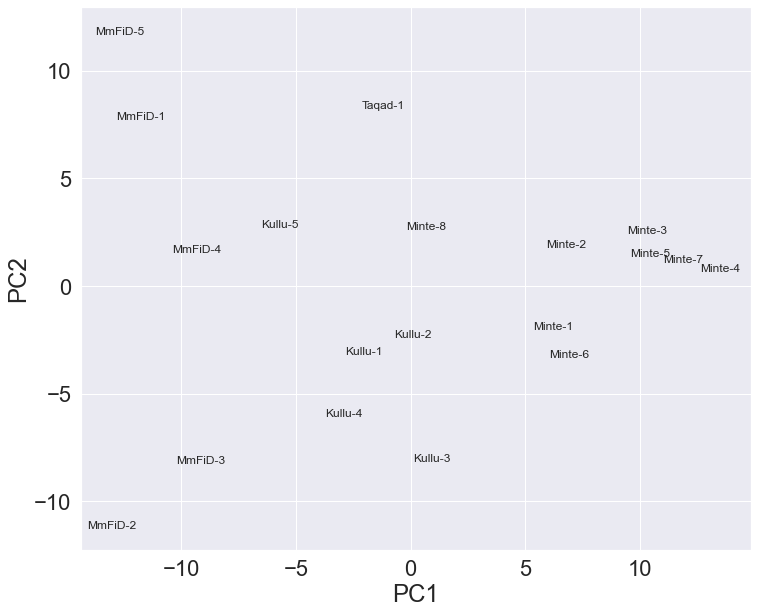

In [33]:
c1, c2 = documents_proj[:, 0], documents_proj[:, 1]

fig, ax = plt.subplots(figsize=(12,10))
ax.scatter(c1, c2, facecolors='none')

fig.add_subplot(ax)

for p1, p2, title in zip(c1, c2, titles):
    ax.text(p1, p2, title[0:5] + title[len(title)-2:len(title)], fontsize=12, ha='center', va='center')

ax.set(xlabel='PC1', ylabel='PC2');


fig.savefig("fig4_2.png")